In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from solver import *

# 2D tests in Dirichlet conditions

## Stationnary equation


*********************************
* Partial differential equation *
*********************************

     ⎛ 2    2             ⎞                 
psiOp⎝η  + ξ  + 1, u(x, y)⎠ = -sin(x)⋅sin(y)

********************
* Equation parsing *
********************


Equation rewritten in standard form: sin(x)*sin(y) + psiOp(eta**2 + xi**2 + 1, u(x, y))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: sin(x)*sin(y) + psiOp(eta**2 + xi**2 + 1, u(x, y))
Analyzing term: sin(x)*sin(y)
  --> Classified as source term
Analyzing term: psiOp(eta**2 + xi**2 + 1, u(x, y))
  --> Classified as pseudo linear term (psiOp)
Final linear terms: {}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, eta**2 + xi**2 + 1)]
Source terms: [sin(x)*sin(y)]
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.
⚠️ For psiOp, use interactive_symbol_analysis.

*******************************
* Solving the stationnary PDE *
*******************************

bound

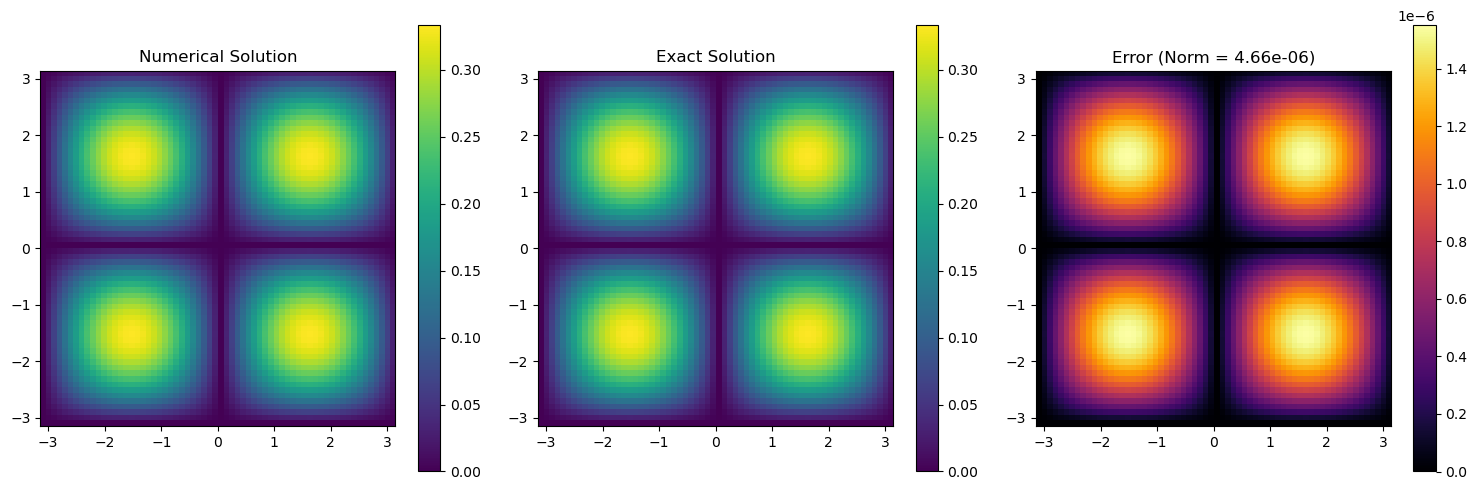

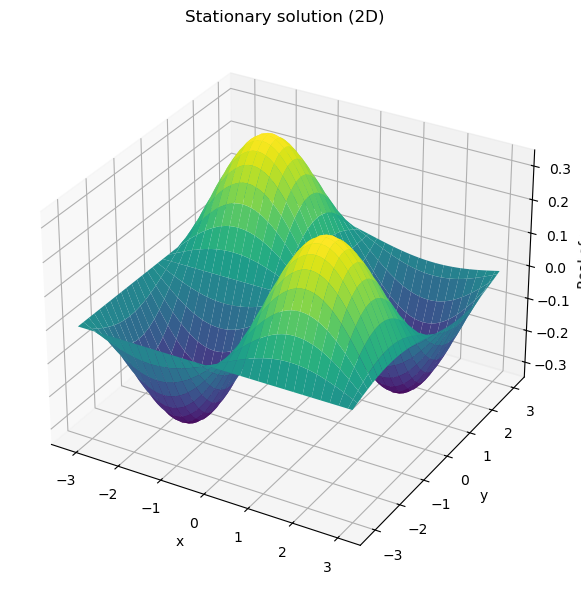

In [3]:
# Symbolic variables
x, y, xi, eta = symbols('x y xi eta', real=True)
u = Function('u')(x, y)

# Symbolic equation
symbol = xi**2 + eta**2 + 1
equation = Eq(psiOp(symbol, u), -sin(x) * sin(y))

# Define exact solution (vanishing at x= -pi, pi and y= -pi, pi)
def u_exact(x, y):
    return -np.sin(x) * np.sin(y) / 3
# Solver creation
solver = PDESolver(equation)

# Domain setup with Dirichlet boundary condition
Lx, Ly = 2 * np.pi, 2 * np.pi
N = 64
Nx, Ny = N, N

# Setup solver
solver.setup(Lx=Lx, Ly=Ly, Nx=Nx, Ny=Ny, boundary_condition='dirichlet', initial_condition=None)

# Stationary solution
u_num = solver.solve_stationary_psiOp(order=6)

# Accuracy test
solver.test(u_exact=u_exact, threshold=1e-5, component='real')

# Plot solution
solver.show_stationary_solution(u=u_num, component='real')

## Stationnary equation with psiOp() depending on spatial variables


*********************************
* Partial differential equation *
*********************************

                                             2    2
     ⎛ 2    2    2    2             ⎞     - x  - y 
psiOp⎝η  + x  + ξ  + y  + 1, u(x, y)⎠ = -ℯ         

********************
* Equation parsing *
********************


Equation rewritten in standard form: exp(-x**2 - y**2) + psiOp(eta**2 + x**2 + xi**2 + y**2 + 1, u(x, y))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: exp(-x**2 - y**2) + psiOp(eta**2 + x**2 + xi**2 + y**2 + 1, u(x, y))
Analyzing term: exp(-x**2 - y**2)
  --> Classified as source term
Analyzing term: psiOp(eta**2 + x**2 + xi**2 + y**2 + 1, u(x, y))
  --> Classified as pseudo linear term (psiOp)
Final linear terms: {}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, eta**2 + x**2 + xi**2 + y**2 + 1)]
Source terms: [exp(-x**2 - y**2)]
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.
⚠️ For psiOp

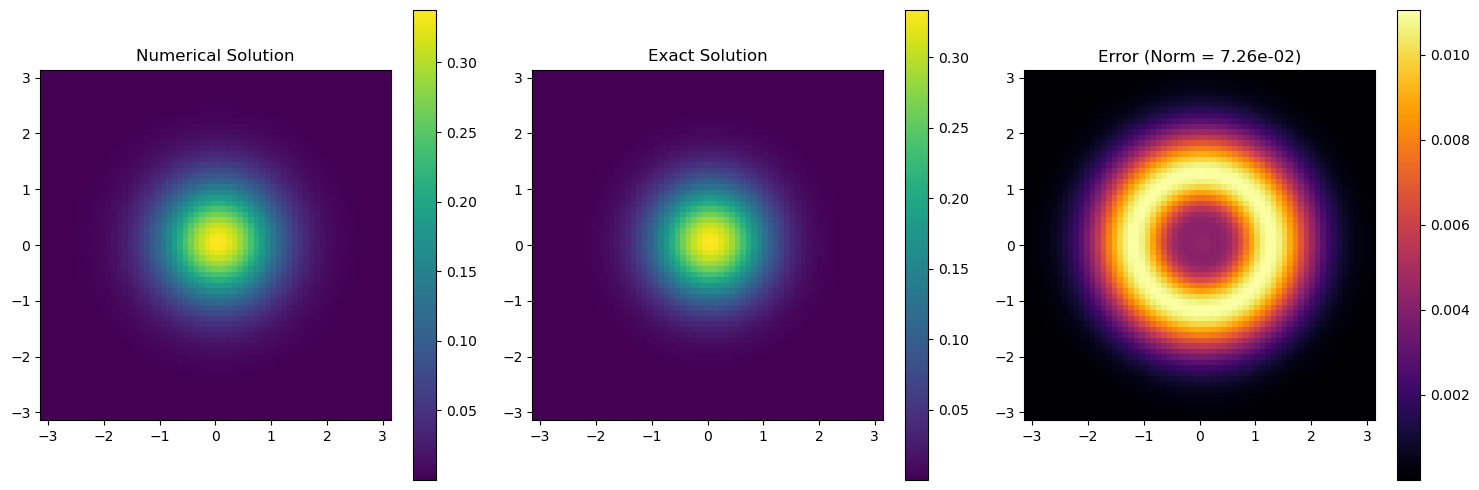

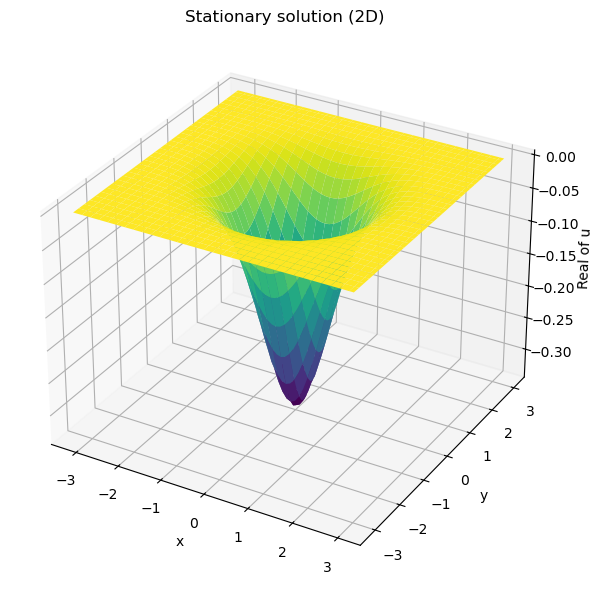

In [4]:
# Symbolic variables
x, y, xi, eta = symbols('x y xi eta', real=True)
u = Function('u')(x, y)
# Symbol dependent on x, y, xi, eta
symbol = x**2 + y**2 + xi**2 + eta**2 + 1  # Elliptic symbol
equation = Eq(psiOp(symbol, u), -exp(-(x**2 + y**2)))  # Source = Gaussian
# Exact solution (satisfies Dirichlet conditions on [-π, π]×[-π, π])
def u_exact(x, y):
    return -np.exp(-(x**2 + y**2)) / 3  # Inverse symbol applied to the source
# Solver configuration
solver = PDESolver(equation)
Lx, Ly = 2 * np.pi, 2 * np.pi  # Extended domain to satisfy Dirichlet
Nx, Ny = 64, 64
# Initialization with Dirichlet conditions
solver.setup(Lx=Lx, Ly=Ly, Nx=Nx, Ny=Ny, boundary_condition='dirichlet')
solver.space_window = True
# Stationary solution
u_num = solver.solve_stationary_psiOp(order=0)
# Accuracy test
solver.test(u_exact=u_exact, threshold=1, component='abs')
# Visualization
solver.show_stationary_solution(u=u_num, component='real')


## Diffusion equation


*********************************
* Partial differential equation *
*********************************

∂                      ⎛ 2    2                ⎞
──(u(t, x, y)) = -psiOp⎝η  + ξ  + 1, u(t, x, y)⎠
∂t                                              

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(eta**2 + xi**2 + 1, u(t, x, y)) + Derivative(u(t, x, y), t)
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(eta**2 + xi**2 + 1, u(t, x, y)) + Derivative(u(t, x, y), t)
Analyzing term: psiOp(eta**2 + xi**2 + 1, u(t, x, y))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x, y), t): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, eta**2 + xi**2 + 1)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been re

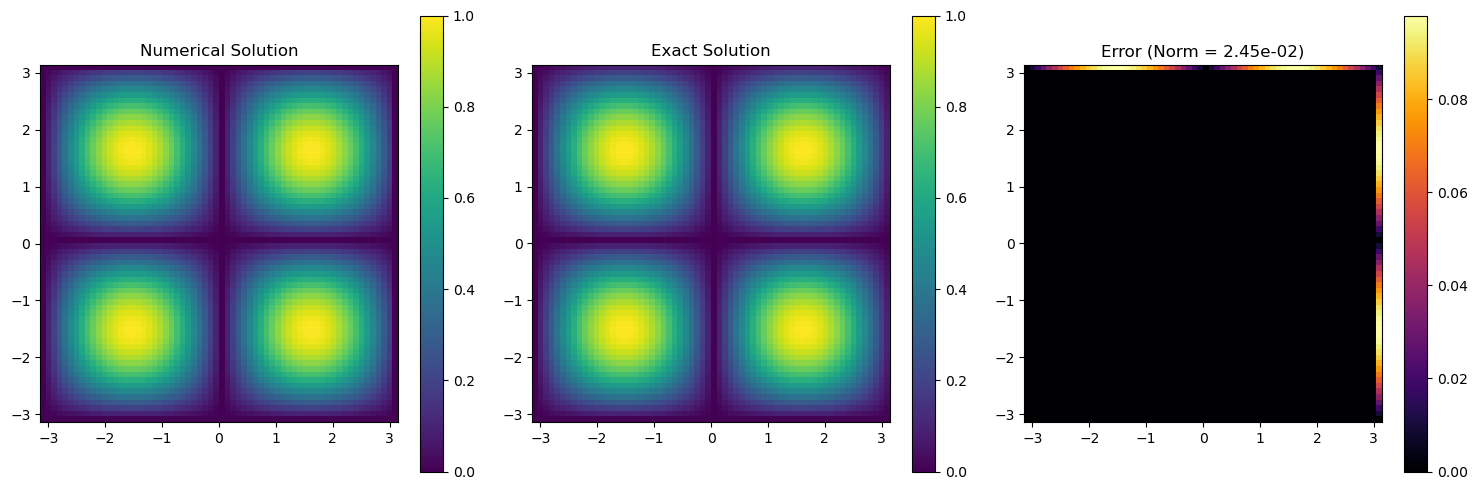

Test à t = 0.50
Closest available time to t_eval=0.5: 0.4
Test error t = 0.4: 7.823e-01


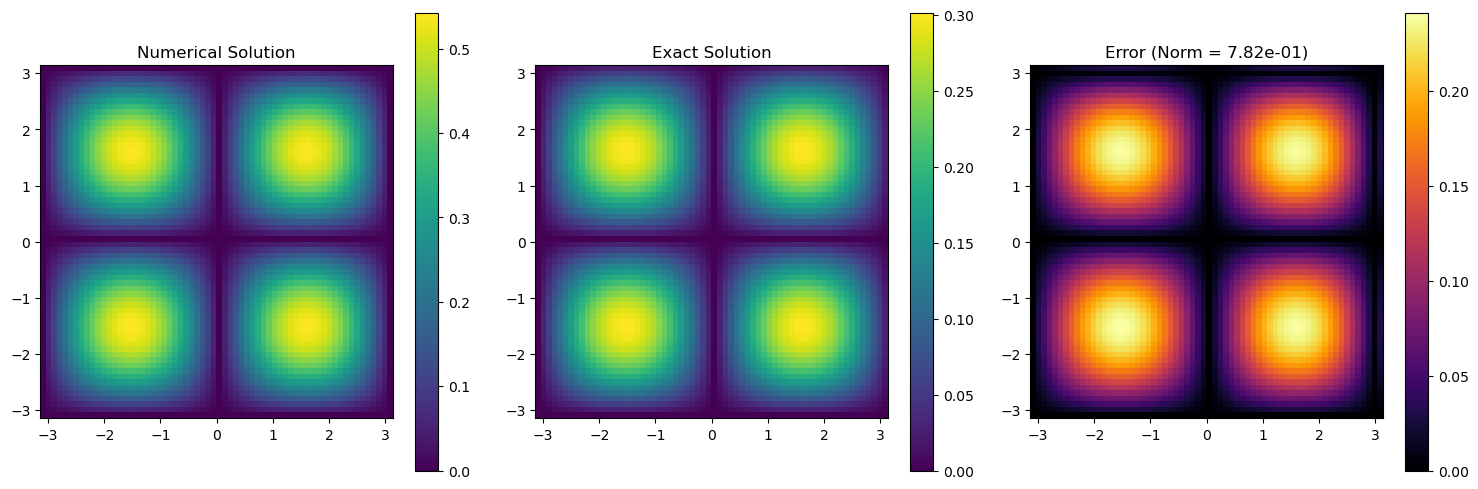

Test à t = 1.00
Closest available time to t_eval=1.0: 1.0
Test error t = 1.0: 7.348e-01


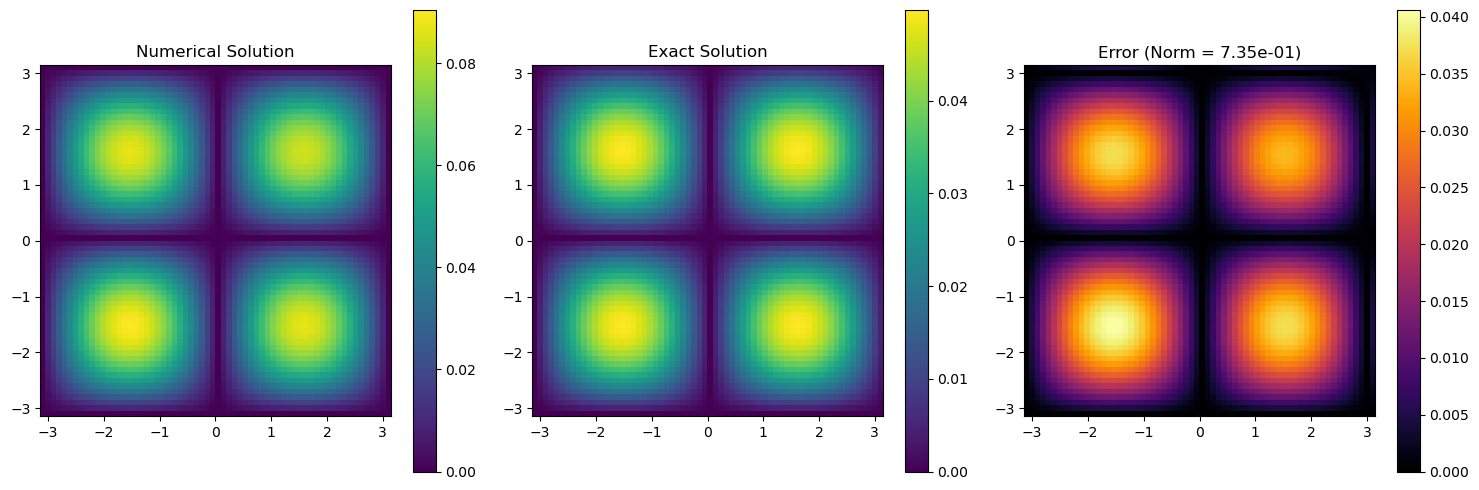

Test à t = 1.50
Closest available time to t_eval=1.5: 1.4000000000000001
Test error t = 1.4000000000000001: 7.065e-01


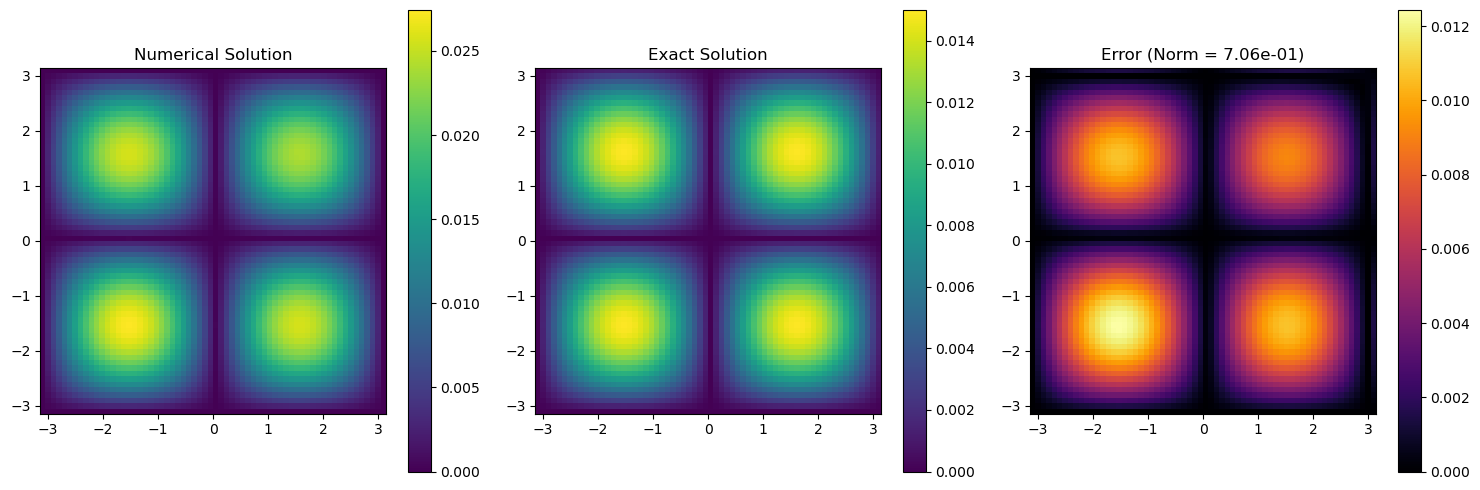

Test à t = 2.00
Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 6.738e-01


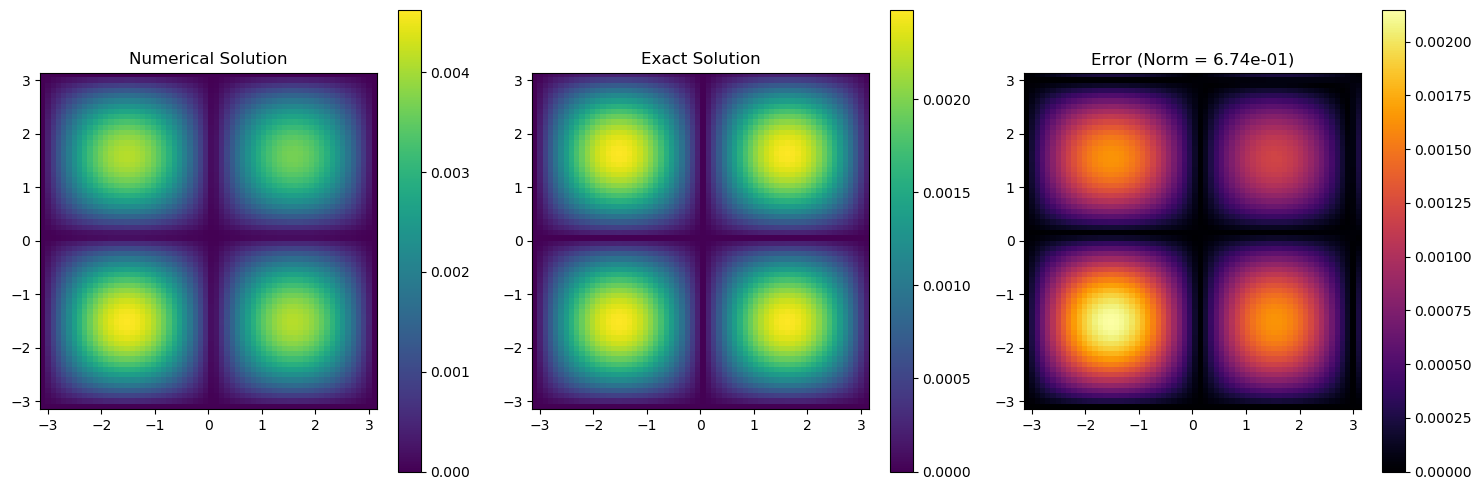

In [5]:
# Variables symboliques
t, x, y, xi, eta = symbols('t x y xi eta', real=True)
u = Function('u')

# Opérateur pseudo-différentiel : ∂u/∂t = -psiOp(ξ² + η² + 1, u)
equation = Eq(diff(u(t, x, y), t), -psiOp(xi**2 + eta**2 + 1, u(t, x, y)))

# Création du solveur
solver = PDESolver(equation)

# Paramètres
Lx, Ly = 2 * np.pi, 2 * np.pi  # Domaine [-π, π] × [-π, π]
Nx, Ny = 64, 64                # Résolution spatiale
Lt = 2.0                        # Durée temporelle
Nt = 500                        # Résolution temporelle

# Condition initiale : produit de sinus
k0, l0 = 1.0, 1.0
initial_condition = lambda x, y: np.sin(k0 * x) * np.sin(l0 * y)

# Solution exacte
def u_exact(x, y, t):
    return np.sin(k0 * x) * np.sin(l0 * y) * np.exp(- (k0**2 + l0**2 + 1) * t)

# Configuration avec conditions de Dirichlet
solver.setup(
    Lx=Lx, Ly=Ly,
    Nx=Nx, Ny=Ny,
    Lt=Lt, Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    n_frames=10  # Pour les animations
)

# Résolution
solver.solve()

# Tests de précision
n_test = 4
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    print(f"Test à t = {t_eval:.2f}")
    solver.test(u_exact=u_exact, t_eval=t_eval, threshold=1, component='real')
